In [1]:
import sklearn
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt


train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', as_supervised=True)
val_dataset,val_info = tfds.load("horses_or_humans", with_info=True, split='test', as_supervised=True)

In [2]:
train_dataset = train_dataset.shuffle(100).batch(32)
val_dataset = val_dataset.batch(32)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size = 3, input_shape = [300,300,3], activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation = 'relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=8, validation_data=val_dataset)

Epoch 1/8
33/33 [==============================] - 44s 1s/step - loss: 79.5290 - accuracy: 0.6952 - val_loss: 1.2703 - val_accuracy: 0.8203
Epoch 2/8
33/33 [==============================] - 37s 1s/step - loss: 0.0973 - accuracy: 0.9688 - val_loss: 0.5531 - val_accuracy: 0.8828
Epoch 3/8
33/33 [==============================] - 33s 1s/step - loss: 0.0106 - accuracy: 0.9990 - val_loss: 0.7959 - val_accuracy: 0.8711
Epoch 4/8
33/33 [==============================] - 33s 1s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1928 - val_accuracy: 0.8672
Epoch 5/8
33/33 [==============================] - 32s 970ms/step - loss: 3.6142e-04 - accuracy: 1.0000 - val_loss: 1.1156 - val_accuracy: 0.8711
Epoch 6/8
33/33 [==============================] - 34s 1s/step - loss: 1.1969e-04 - accuracy: 1.0000 - val_loss: 1.0953 - val_accuracy: 0.8789
Epoch 7/8
33/33 [==============================] - 33s 981ms/step - loss: 1.2828e-04 - accuracy: 1.0000 - val_loss: 1.1479 - val_accuracy: 0.8711
Epoch 8/

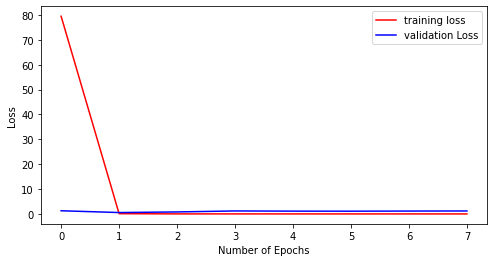

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['loss'], 'r', label='training loss')
plt.plot(range(8), history.history['val_loss'], 'b', label='validation Loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.show()

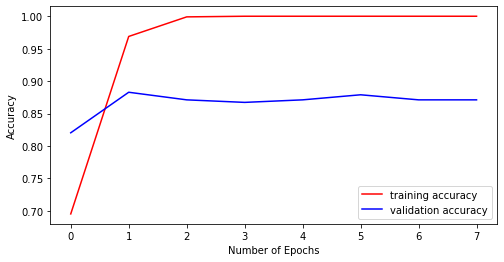

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(8), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Accuracy")
plt.show()

In [7]:
model.save_weights('My_model.h5')
model.load_weights('My_model.h5')

In [8]:
# Defining all test images
horse1 = 'images/hest_01.png'
horse2 = 'images/hest_02.png'
horse3 = 'images/hest_03.png'
horse4 = 'images/hest_04.png'
horse5 = 'images/hest_05.png'
horse6 = 'images/hest_06.png'
horse7 = 'images/hest_07.png'

human1 = 'images/human_01.png'
human2 = 'images/human_02.png'
human3 = 'images/human_03.png'

In [59]:
from tensorflow.keras.preprocessing import image
import numpy as np


def pred_horse_human(horse_human):
    test_image = image.load_img(horse_human, target_size = (300, 300))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis = 0)

    result = model.predict(test_image)

    pred = np.argmax(result)
    print(result, "-->", pred)


    if pred == 0:
        print("Predicted as a HORSE")
    else:
        print("Predicted as a HUMAN")

In [ ]:
for horse_human in [horse1, horse2, horse3, horse4, horse5, horse6, horse7, human1, human2, human3]:
    pred_horse_human(horse_human)

In [61]:
model.evaluate(val_dataset)

8/8 [==============================] - 3s 369ms/step - loss: 1.1859 - accuracy: 0.8711


[1.1858751773834229, 0.87109375]